# Logistic Model
$$
x_{n+1} = ax_n (1 - x_n), \qquad (0 \le x \le 1, a \in (0, 4))
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

In [2]:
logging.getLogger().setLevel(logging.INFO)

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.rcParams['text.usetex'] = True
# plt.style.use('default')
plt.style.use(['seaborn-darkgrid', 'seaborn-notebook'])

The logistic model
$$
x_{n+1} = ax_n (1 - x_n) \qquad (x_n \in (0, 1))
$$
with $0 \le a \le 4$.

In [5]:
def logistic(a: np.ndarray, x: np.ndarray):
    '''Return the matrix multiplication of ax(1-x)'''
    return np.multiply(np.multiply(a, x), (1 - x))

## Calculation

### For the step plot

In [6]:
# Logistic
# Error tolerence
err_tol = 1e-4
# Parameters
a = float(input("请输入参数 a (0<a<4, default to 2.707):") or 2.707)
# Initial value of x0
initX = float(input("请输入参数 x0 (0<=x0<=1, default to 0.1):") or 0.1)

请输入参数 a (0<a<4, default to 2.707): 
请输入参数 x0 (0<=x0<=1, default to 0.1): 


In [7]:
# The function lines
x = np.linspace(0, 1)
y1 = logistic(a, x)
y2 = x

INFO:root:
正在计算 Logistic 图……


In [8]:
# The step lines
stepX = [initX, logistic(a, initX)]

In [10]:
while np.abs(stepX[-1] - stepX[-2]) >= err_tol:
    stepX.append(logistic(a, stepX[-1]))

INFO:root:Logistic 图计算完成。


### For the Feigenbaum plot

In [11]:
# Error tolerence
err_tol = 1e-6
numa = 1000
alist = np.linspace(2.6, 4, num=numa)
initX = 0.6

In [19]:
# The step lines
Xn = initX
Dict = {}

In [20]:
for a in alist:
    Xn = np.append(initX, [logistic(a, initX)])
    
    while np.abs(Xn[-2] - Xn[-1]) >= err_tol:
        new = logistic(a, Xn[-1])
        
        if (np.abs(new - Xn) < err_tol).any():
            i, = np.where(np.abs(new - Xn) < err_tol)
            i = np.array(i)[0]
            break
        else:
            Xn = np.append(Xn, new)
    Dict[a] = Xn[i:]

INFO:root:正在计算 Feigenbaum 图……
INFO:root:Feigenbaum 图计算完成。


## Plotting

INFO:root:正在绘图……


Text(0.5, 1.0, 'Ligistic iteration steps')

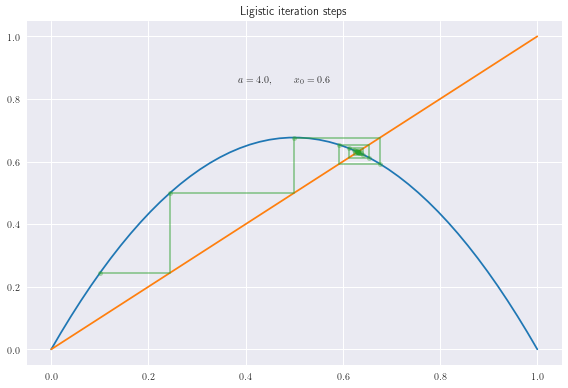

In [21]:
# The Logistic plot
fig, ax = plt.subplots(tight_layout=True)

ax.annotate("$a = {}, \qquad x_0 = {}$".format(a, initX), xy=(0.5, 0.8), xycoords='figure fraction', horizontalalignment='center', verticalalignment='top',)

ax.plot(x, y1)
ax.plot(x, y2)
ax.step(stepX[:-1], stepX[1:], where='post', alpha=0.5,)
ax.plot(stepX[:-1], stepX[1:], 'C2o', alpha=0.37, markersize=5)
plt.title('Ligistic iteration steps')

In [22]:
# # Save the plot
# try:
#     fig.savefig("../image/logistic.png")
# except Exception as e:
#     logging.error(e)

In [23]:
# The Feigenbaum plot
aPlot = [a for a, data in zip(Dict, Dict.values()) for j in data]
yPlot = [val for data in Dict.values() for val in data]

Text(0.5, 1.0, 'Feigenbaum plot')

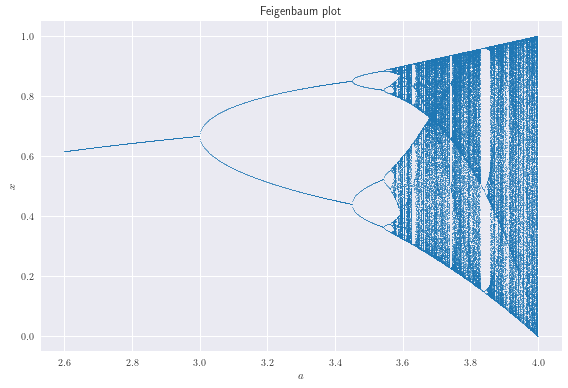

In [24]:
fig2, ax2 = plt.subplots(tight_layout=True)

ax2.scatter(aPlot, yPlot, marker='.', s=1)
plt.xlabel(r'$a$')
plt.ylabel(r'$x$')
plt.title('Feigenbaum plot')

In [18]:
# # Save and show the plot
# try:
#     fig2.savefig("../image/feigenbaum.png")
# except Exception as e:
#     logging.error(e)